In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv('../data/updated_data.csv')

In [36]:
# Scale data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])
df_scaled['symbol'] = df['symbol']

In [37]:
# log transform everything

cols = list(df_scaled.columns)
cols.pop(-1)

df_scaled.fillna(method='ffill', inplace=True)
df_log = np.log1p(df_scaled[cols] + 1e-6)
df_log.fillna(method='ffill', inplace=True)
df_log.fillna(method='bfill', inplace=True)

<ipython-input-37-9952dc171b30>:6: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/parkercarrus/miniforge3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning:

invalid value encountered in log1p

<ipython-input-37-9952dc171b30>:8: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

<ipython-input-37-9952dc171b30>:9: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [38]:
from sklearn.metrics import silhouette_score

cluster_range = range(2, 40)
silhouette_scores = []
wcss_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_log[cols])
    score = silhouette_score(df_log[cols], cluster_labels)
    silhouette_scores.append(score)
    wcss_scores.append(kmeans.inertia_)

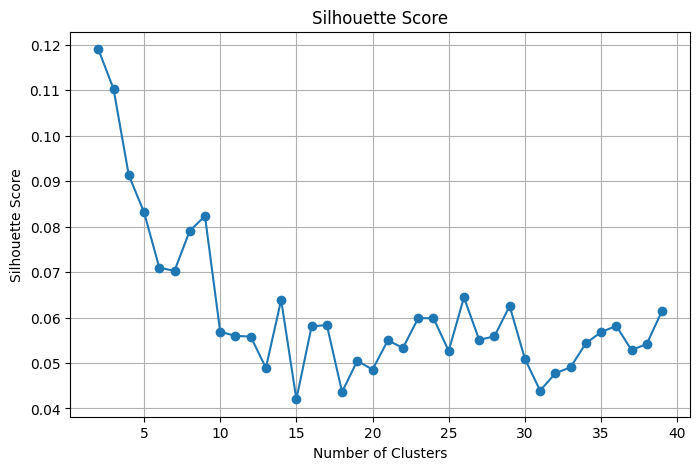

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [40]:
from sklearn.cluster import KMeans

cluster_results = pd.DataFrame({'symbol': df['symbol']})

for k in range(5, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_log[cols])
    cluster_results[f'k={k}'] = cluster_labels

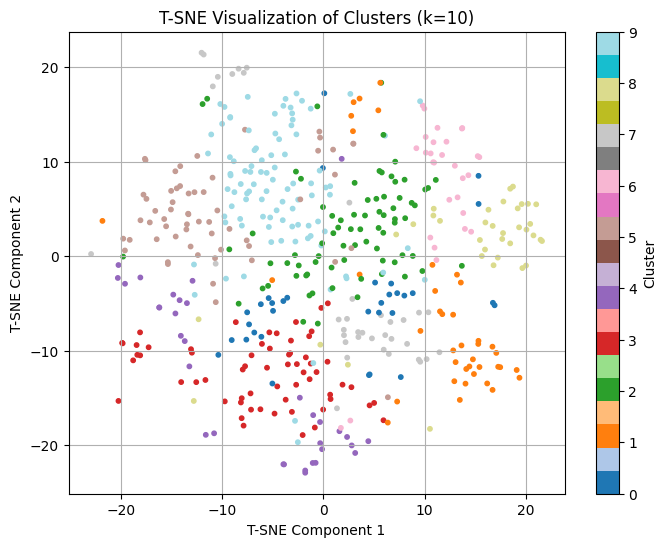

In [41]:
from sklearn.manifold import TSNE

# Apply T-SNE to reduce dimensions to 2 for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
df_tsne = tsne.fit_transform(df_log[cols])

# Plot the T-SNE reduced data with clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=cluster_results['k=10'], cmap='tab20', s=10)
plt.title('T-SNE Visualization of Clusters (k=10)')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [42]:
newcols = df.columns[1:16]

from sklearn.metrics import silhouette_score

cluster_range = range(2, 40)
silhouette_scores = []
wcss_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_log[newcols])
    score = silhouette_score(df_log[newcols], cluster_labels)
    silhouette_scores.append(score)
    wcss_scores.append(kmeans.inertia_)

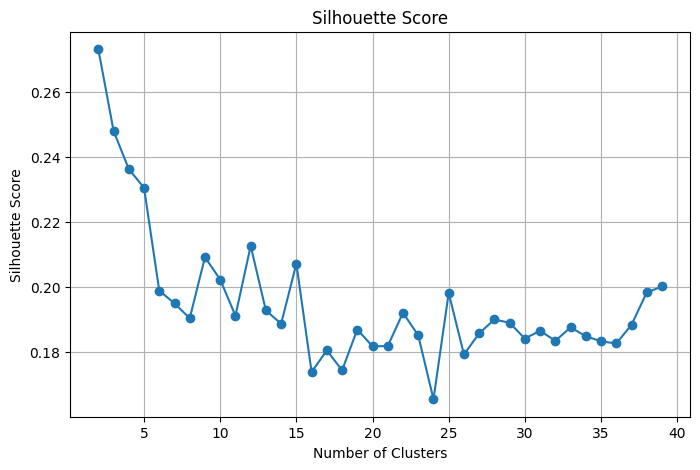

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [44]:
from sklearn.cluster import KMeans

new_cluster_results = pd.DataFrame({'symbol': df['symbol']})

for k in range(5, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_log[newcols])
    new_cluster_results[f'k={k}'] = cluster_labels

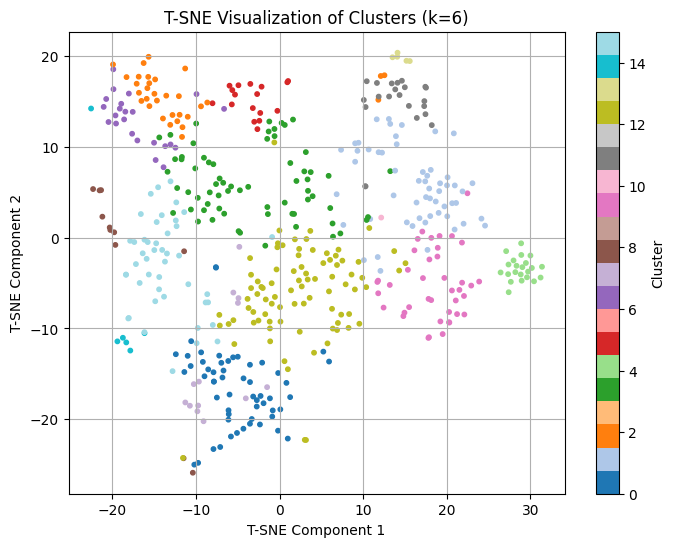

In [47]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
df_tsne = tsne.fit_transform(df_log[newcols])

plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=new_cluster_results['k=16'], cmap='tab20', s=10)
plt.title('T-SNE Visualization of Clusters (k=6)')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
clusters_k6 = {}
for cluster_id in range(6):
    clusters_k6[cluster_id] = new_cluster_results.loc[new_cluster_results['k=6'] == cluster_id, 'symbol'].tolist()

for cluster_id, stocks in clusters_k6.items():
    print(f"Cluster {cluster_id}: {stocks}")

Cluster 0: ['BX', 'ACGL', 'PCG', 'CSGP', 'INVH', 'CPT', 'BRO', 'MRNA', 'PTC', 'TRMB', 'TYL', 'ATO', 'FANG', 'CPAY', 'EVRG', 'SBAC', 'ARE', 'RJF', 'SRE', 'REG', 'D', 'COO', 'LNT', 'AJG', 'GPN', 'AWK', 'FRT', 'EXR', 'SYF', 'ESS', 'KMI', 'CCI', 'BLK', 'CB', 'ROP', 'WELL', 'IRM', 'WEC', 'NDAQ', 'IVZ', 'CTRA', 'AMT', 'ICE', 'MCHP', 'DFS', 'AVB', 'FIS', 'KIM', 'BXP', 'AMP', 'PLD', 'GEN', 'SPG', 'EQR', 'PPL', 'FI', 'MET', 'INTU', 'NI', 'ROK', 'ADI', 'AFL', 'DHR', 'AES', 'BEN', 'CINF', 'FE', 'AON', 'L', 'AEE', 'GL', 'CNP', 'RVTY', 'APD', 'ADP', 'AIG', 'AXP', 'DUK', 'NEE', 'WMB', 'AEP', 'BA', 'CMS', 'DTE', 'ED', 'EIX', 'ETR', 'EXC', 'NSC', 'PEG', 'SO', 'SPGI']
Cluster 1: ['WDAY', 'HUBB', 'KVUE', 'GEHC', 'FSLR', 'EQT', 'ON', 'NDSN', 'CEG', 'EPAM', 'MTCH', 'TECH', 'CRL', 'GNRC', 'NXPI', 'ENPH', 'TDY', 'DXCM', 'CARR', 'IR', 'PAYC', 'STE', 'ZBRA', 'WRB', 'LVS', 'IEX', 'TROW', 'TMUS', 'WAB', 'TFX', 'CE', 'KEYS', 'BR', 'NCLH', 'IQV', 'AOS', 'PKG', 'BKR', 'ALGN', 'EG', 'HLT', 'AMD', 'CBOE', 'INCY', 'C

In [58]:
clusters_k10 = {}
for cluster_id in range(10):
    clusters_k10[cluster_id] = cluster_results.loc[cluster_results['k=10'] == cluster_id, 'symbol'].tolist()

for cluster_id, stocks in clusters_k10.items():
    print(f"Cluster {cluster_id}: {stocks}")

Cluster 0: ['HUBB', 'VLTO', 'FICO', 'PODD', 'CPT', 'GNRC', 'MPWR', 'IEX', 'WAB', 'ATO', 'IDXX', 'UDR', 'AWK', 'O', 'ALLE', 'AME', 'MDLZ', 'XYL', 'TEL', 'KMX', 'OKE', 'VTR', 'WYNN', 'FAST', 'AVB', 'CTAS', 'A', 'MAR', 'CINF', 'AMAT', 'BSX', 'HD', 'DIS']
Cluster 1: ['APO', 'KKR', 'INVH', 'DAY', 'CPAY', 'SBAC', 'EG', 'D', 'CFG', 'SYF', 'DOC', 'AMT', 'ICE', 'DFS', 'CME', 'KIM', 'EL', 'MTB', 'PLD', 'STT', 'GS', 'PFG', 'PRU', 'MET', 'USB', 'COF', 'NTRS', 'TFC', 'HBAN', 'SCHW', 'FITB', 'BK', 'KEY', 'MS', 'AMGN', 'C', 'PNC', 'T', 'WFC', 'JPM']
Cluster 2: ['TPL', 'ERIE', 'PLTR', 'LULU', 'PANW', 'GEHC', 'ACGL', 'MTCH', 'TSLA', 'DPZ', 'CARR', 'LYV', 'JKHY', 'FTNT', 'ROL', 'ANET', 'RMD', 'HLT', 'RJF', 'CBOE', 'HWM', 'MTD', 'GPN', 'FRT', 'UAL', 'EQIX', 'META', 'ZTS', 'GM', 'GRMN', 'MNST', 'KMI', 'CCI', 'BLK', 'NFLX', 'ROST', 'V', 'BKNG', 'PWR', 'CRM', 'ISRG', 'HST', 'VRSN', 'PSA', 'MKC', 'EA', 'SPG', 'EQR', 'EOG', 'OMC', 'YUM', 'ADBE', 'AON', 'EMN', 'COST', 'IPG', 'LIN', 'SYY', 'ITW', 'HES', 'LOW', 

PYPL is in cluster 5

In [72]:
price = pd.read_csv('/Users/parkercarrus/Documents/Algory.nosync/Cluster3/Algory_Cluster/data/sp_price_data.csv')

In [99]:
# calculate PYPL correlation with cluster

cluster_correlations = {}

for cluster_id, stocks in clusters_k10.items():
    cluster_prices = price[price['symbol'].isin(stocks)]
    pivot_prices = cluster_prices.pivot(index='date', columns='symbol', values='close')
    correlation_matrix = pivot_prices.corr()
    cluster_correlations[cluster_id] = correlation_matrix

print(f"PYPL correlation with cluster {cluster_correlations[5]['PYPL'].mean()}")

PYPL correlation with cluster 0.17460715705858407


In [ ]:
grouped_close = price.groupby('symbol')['close'].apply(list)
correlation_matrix = grouped_close.apply(pd.Series).transpose().corr()
print(f"PYPL mean correlation with SP {correlation_matrix['PYPL'].mean()}")

PYPL mean correlation with SP -0.025088748210791104


Plot stocks in cluster

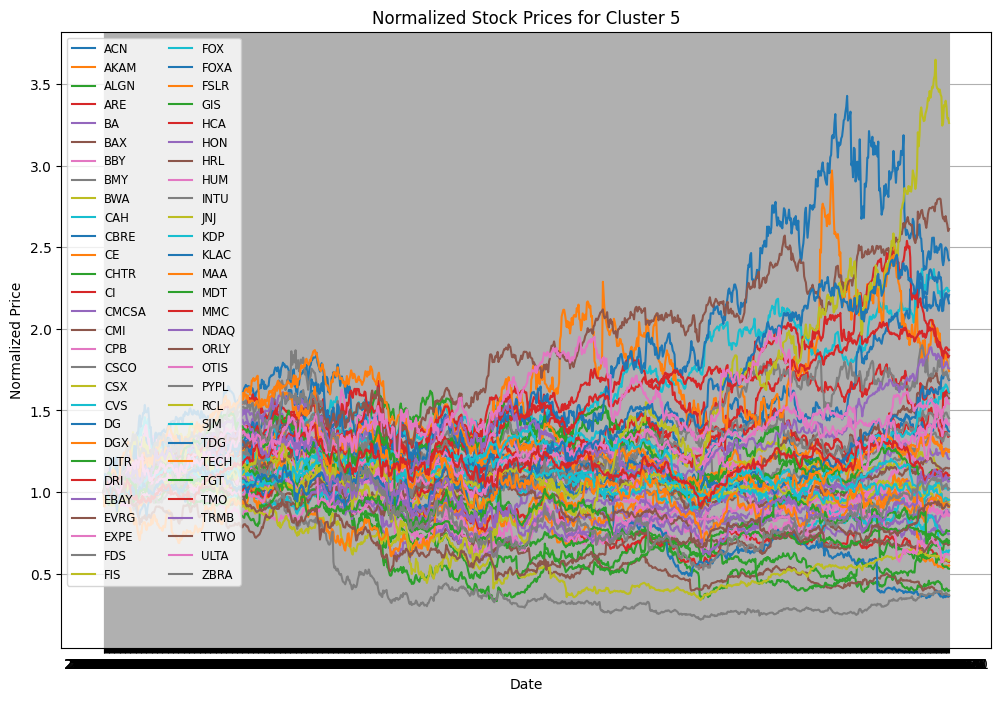

In [100]:
import matplotlib.pyplot as plt

# Get the list of stocks in cluster 5
cluster_5_stocks = clusters_k10[5]

# Filter the price data for the stocks in cluster 5
cluster_5_prices = price[price['symbol'].isin(cluster_5_stocks)]

# Pivot the data to have dates as index and symbols as columns
pivot_cluster_5_prices = cluster_5_prices.pivot(index='date', columns='symbol', values='close')

# Normalize the prices by dividing each stock's price by its initial price
normalized_prices = pivot_cluster_5_prices / pivot_cluster_5_prices.iloc[0]

# Plot the normalized prices
plt.figure(figsize=(12, 8))
for stock in normalized_prices.columns:
    plt.plot(normalized_prices.index, normalized_prices[stock], label=stock)

plt.title('Normalized Stock Prices for Cluster 5')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend(loc='upper left', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

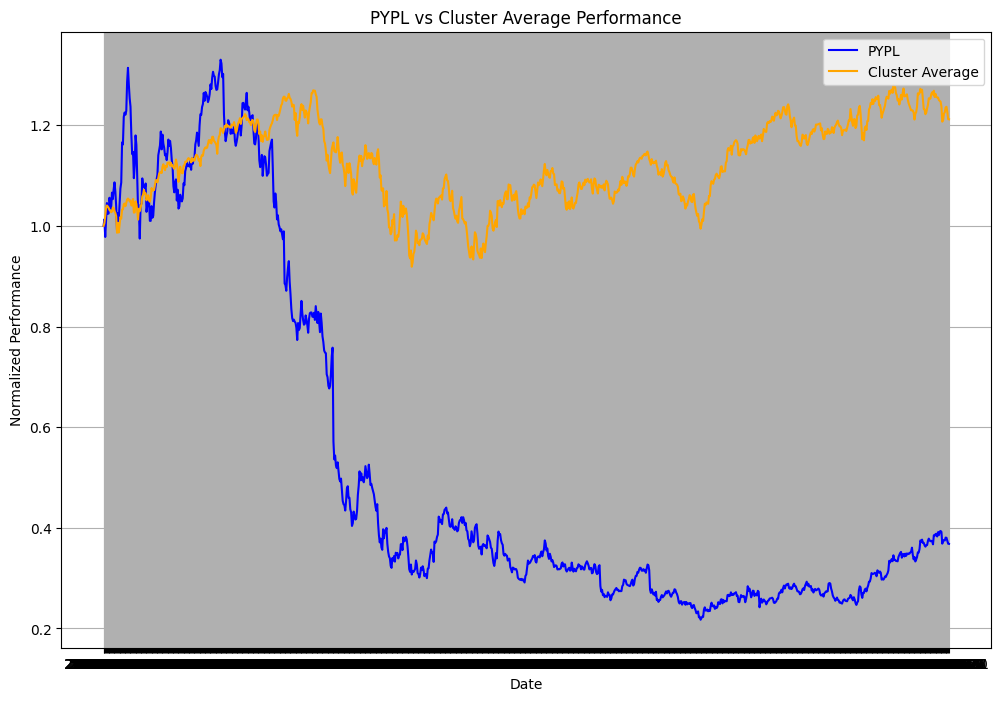

In [101]:
# Filter the price data for PYPL and its cluster stocks
pypl_cluster_prices = pivot_cluster_5_prices[pypl_cluster]

# Calculate the average performance of the cluster
average_cluster_performance = pypl_cluster_prices.mean(axis=1)

# Normalize PYPL's performance and the cluster's average performance
pypl_normalized = pypl_cluster_prices['PYPL'] / pypl_cluster_prices['PYPL'].iloc[0]
average_cluster_normalized = average_cluster_performance / average_cluster_performance.iloc[0]

# Plot the normalized performance
plt.figure(figsize=(12, 8))
plt.plot(pypl_normalized.index, pypl_normalized, label='PYPL', color='blue')
plt.plot(average_cluster_normalized.index, average_cluster_normalized, label='Cluster Average', color='orange')

plt.title('PYPL vs Cluster Average Performance')
plt.xlabel('Date')
plt.ylabel('Normalized Performance')
plt.legend()
plt.grid(True)
plt.show()

PYPL seems less correlated with the cluster than other stocks

In [103]:
# calculate PYPL correlation with cluster

cluster_correlations[5]['PYPL'].mean()

0.17460715705858407

In [ ]:
stock_cluster_corrs = {}
for symbol in cluster_correlations[5]:
    stock_cluster_corrs[symbol] = cluster_correlations[5][symbol].mean()

In [112]:
np.mean(list(stock_cluster_corrs.values()))

0.12038462984807961

It actually has a higher than average correlation with the cluster

Analyze for k=6 (including slope data)

In [114]:
# calculate PYPL correlation with cluster

cluster_correlations = {}

for cluster_id, stocks in clusters_k6.items():
    cluster_prices = price[price['symbol'].isin(stocks)]
    pivot_prices = cluster_prices.pivot(index='date', columns='symbol', values='close')
    correlation_matrix = pivot_prices.corr()
    cluster_correlations[cluster_id] = correlation_matrix

print(f"PYPL correlation with cluster {cluster_correlations[1]['PYPL'].mean()}")

PYPL correlation with cluster -0.03695596178258152
